In [23]:
import numpy as np
import apogee_tools as ap
import time
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d
from scipy.integrate import trapz

In [2]:
init_param, step_param, init_theta, step_theta, fiber, tell_sp, lsf = ap.initialize()


[23.628702878952026s] MCMC initialization step complete.


/home/jess/Desktop/astro_code/apogee_tools/apogee_tools/apogee_hack/spec/lsf.py:177: RuntimeWarning: invalid value encountered in less
  out[out<0.]= 0.
/home/jess/Desktop/astro_code/apogee_tools/apogee_tools/apogee_hack/spec/lsf.py:178: RuntimeWarning: invalid value encountered in true_divide
  out/= numpy.tile(numpy.sum(out,axis=1),(len(x),1)).T


In [4]:
mdl1 = ap.makeModel(params=init_param, lsf=lsf, telluric=tell_sp, method='splat')
mdl2 = ap.makeModel(params=init_param, lsf=lsf, telluric=tell_sp, method='fast')


##################################################
Making model: teff=3500 logg=4.5 fe_h=0.0 rv=-4.77 vsini=5.79 alpha=1.0
[0.06456232070922852s] Interpolated model
[0.018630266189575195s] Shifted radial velocity
[0.05144095420837402s] Applied vsini broadening
[2.131718635559082s] Convolved telluric model
[0.07349801063537598s] Applied LSF broadening 


##################################################
Making model: teff=3500 logg=4.5 fe_h=0.0 rv=-4.77 vsini=5.79 alpha=1.0
[0.03215622901916504s] Interpolated model
[0.01688551902770996s] Shifted radial velocity
[0.04939770698547363s] Applied vsini broadening
[0.09387016296386719s] Convolved telluric model
[0.07122492790222168s] Applied LSF broadening 



In [29]:
def integrateFlux(x, y):
    
    int_arr = []
    for i in range(len(x)-1):
        dx = x[i+1] - x[i]
        int_arr.append(y[i]*dx)
        
    integ = np.nansum(int_arr)
    
    print(integ)

In [30]:
integrateFlux(mdl1.wave, mdl1.flux)
integrateFlux(mdl2.wave, mdl2.flux)

1488.851042423555
1488.8510384891579


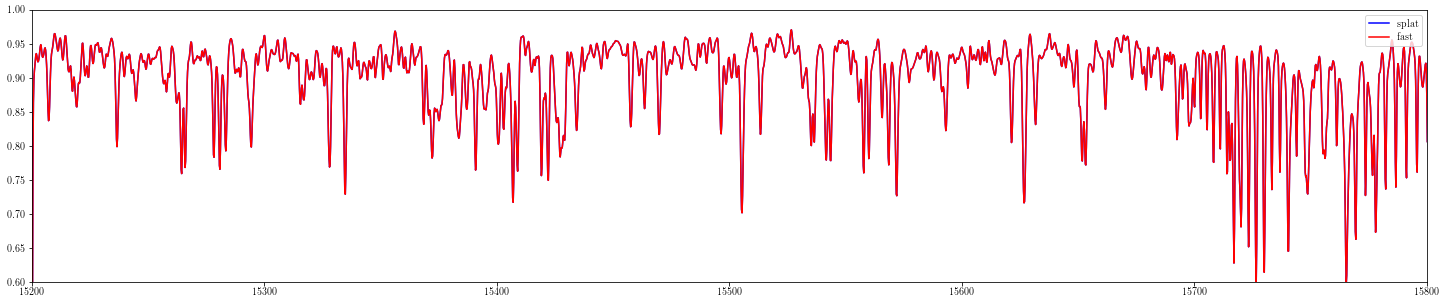

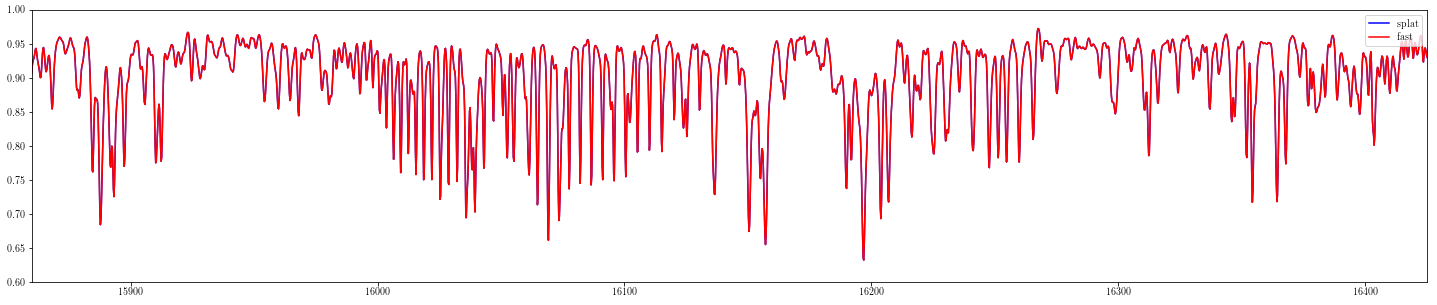

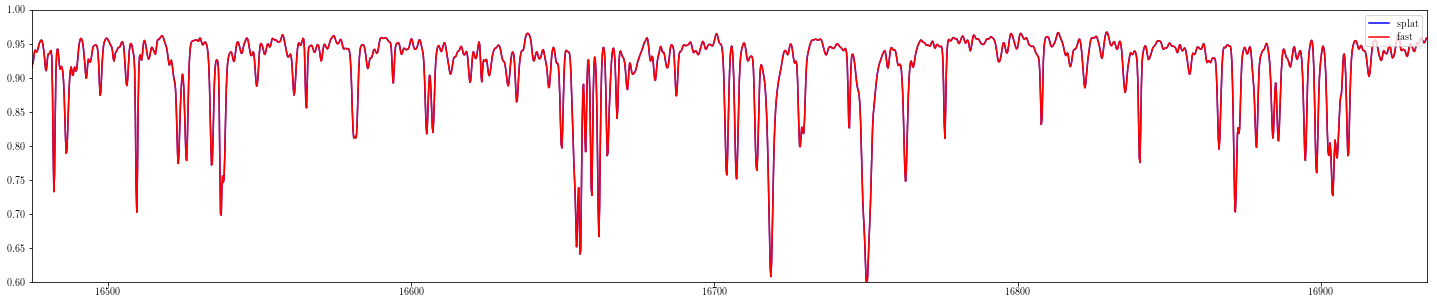

In [31]:
bands = [[15200,15800],[15860,16425],[16475,16935]]

for band in bands:
    plt.figure(figsize=[25,5])
    plt.plot(mdl1.wave, mdl1.flux, color='b', label='splat')
    plt.plot(mdl1.wave, mdl1.flux, color='r', label='fast')
    plt.legend(loc='upper right')
    plt.ylim(.6, 1)
    plt.xlim(band)
    plt.show()
    plt.close()